In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


API_KEY = "19fe6d90e7facf17212f8baf9d877077"
CITY = 'Delhi'
URL = f'http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric'

response = requests.get(URL)
data = response.json()

# Extract relevant info
weather_list = data['list']
weather_data = []

for item in weather_list:
    weather_data.append({
        'datetime': item['dt_txt'],
        'temperature': item['main']['temp'],
        'humidity': item['main']['humidity'],
        'wind_speed': item['wind']['speed']
    })

df = pd.DataFrame(weather_data)
print(df.head())
print(data)


              datetime  temperature  humidity  wind_speed
0  2025-07-08 18:00:00        32.28        56        4.06
1  2025-07-08 21:00:00        32.69        50        2.98
2  2025-07-09 00:00:00        31.27        46        4.03
3  2025-07-09 03:00:00        32.36        46        4.75
4  2025-07-09 06:00:00        36.02        39        5.26
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1751997600, 'main': {'temp': 32.28, 'feels_like': 36.52, 'temp_min': 32.2, 'temp_max': 32.28, 'pressure': 999, 'sea_level': 999, 'grnd_level': 974, 'humidity': 56, 'temp_kf': 0.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 100}, 'wind': {'speed': 4.06, 'deg': 285, 'gust': 5.01}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-07-08 18:00:00'}, {'dt': 1752008400, 'main': {'temp': 32.69, 'feels_like': 35.67, 'temp_min': 32.69, 'temp_max': 32.87, 'pressure': 998, 'sea_level': 998, 'grnd_level': 972, 'hum

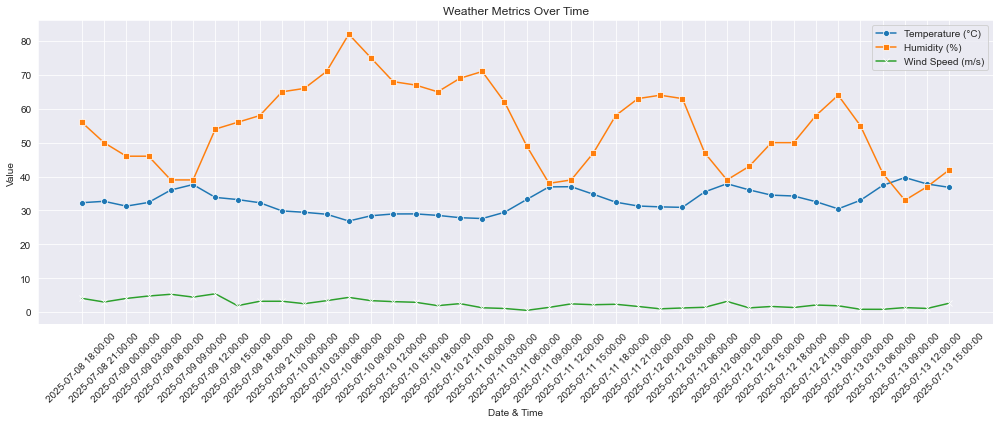

In [18]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='datetime', y='temperature', data=df, label='Temperature (°C)', marker='o')
sns.lineplot(x='datetime', y='humidity', data=df, label='Humidity (%)', marker='s')
sns.lineplot(x='datetime', y='wind_speed', data=df, label='Wind Speed (m/s)', marker='x')

plt.xticks(rotation=45)
plt.title("Weather Metrics Over Time")
plt.xlabel("Date & Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


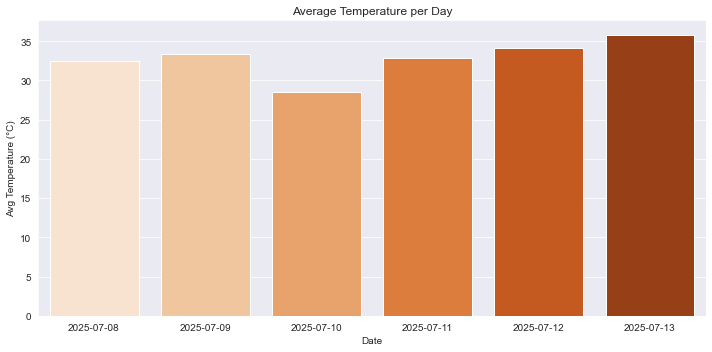

In [19]:
# Convert datetime to just date
df['date'] = pd.to_datetime(df['datetime']).dt.date

# Group by date and get average temperature
daily_avg_temp = df.groupby('date')['temperature'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='date', y='temperature', data=daily_avg_temp, palette='Oranges')
plt.title("Average Temperature per Day")
plt.xlabel("Date")
plt.ylabel("Avg Temperature (°C)")
plt.tight_layout()
plt.show()


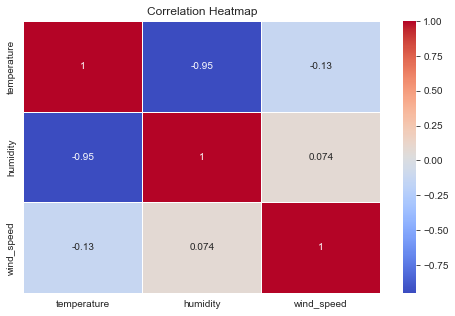

In [20]:
plt.figure(figsize=(8, 5))
corr = df[['temperature', 'humidity', 'wind_speed']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


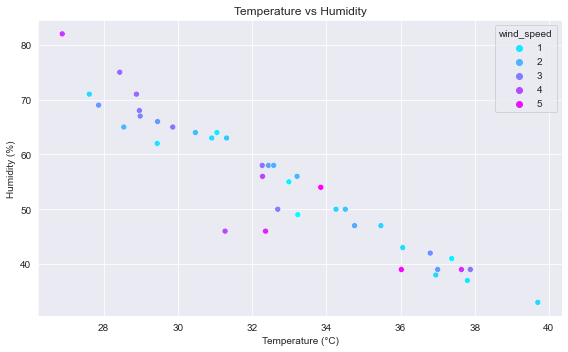

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temperature', y='humidity', data=df, hue='wind_speed', palette='cool')
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.show()
